### REGION GROWING

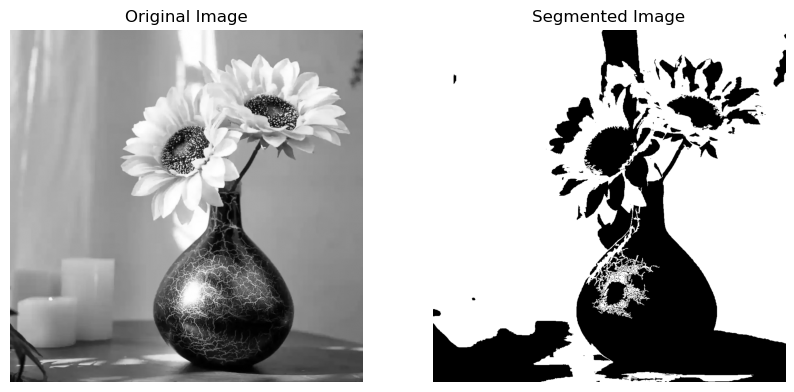

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def region_growing(image, seed, threshold):
   
    # Initialize the segmented image with zeros
    segmented_image = np.zeros_like(image)
    
    # Get the intensity of the seed point
    seed_intensity = image[seed]
    
    # Create a list to hold the pixels to be checked
    pixels_to_check = [seed]
    
    while pixels_to_check:
        # Get the current pixel
        current_pixel = pixels_to_check.pop(0)
        x, y = current_pixel
        
        # Check if the pixel is within the bounds of the image
        if x < 0 or x >= image.shape[0] or y < 0 or y >= image.shape[1]:
            continue
        
        # Check if the pixel has already been segmented
        if segmented_image[x, y] == 1:
            continue
        
        # Check if the pixel intensity is similar to the seed intensity
        if abs(int(image[x, y]) - int(seed_intensity)) <= threshold:
            # Mark the pixel as part of the segmented region
            segmented_image[x, y] = 1
            
            # Add neighboring pixels to check (4-connectivity)
            pixels_to_check.append((x+1, y))  # Down
            pixels_to_check.append((x-1, y))  # Up
            pixels_to_check.append((x, y+1))  # Right
            pixels_to_check.append((x, y-1))  # Left
            
    return segmented_image

# Load an example image (grayscale)
image_path = 'flower.jpg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define seed point and threshold for similarity
seed_point = (40, 40)  # Example seed point (y,x)
similarity_threshold = 60

# Perform region growing segmentation
segmented_result = region_growing(image, seed_point, similarity_threshold)

# Display original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_result, cmap='gray')
plt.axis('off')

plt.show()


### K MEANS CLUSTERING

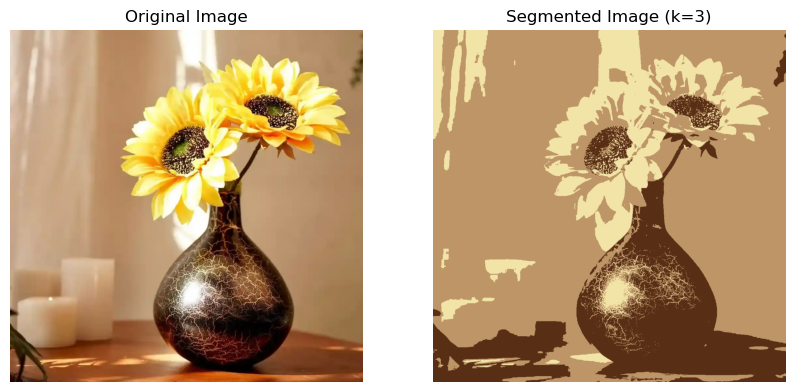

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def initialize_centroids(pixel_values, k):
    """Randomly initialize centroids from the pixel values."""
    np.random.seed(42)  # For reproducibility
    random_indices = np.random.choice(pixel_values.shape[0], size=k, replace=False)
    return pixel_values[random_indices]

def assign_clusters(pixel_values, centroids):
    """Assign each pixel to the nearest centroid."""
    distances = np.linalg.norm(pixel_values[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(pixel_values, clusters, k):
    """Update centroids by calculating the mean of points in each cluster."""
    new_centroids = np.array([pixel_values[clusters == i].mean(axis=0) for i in range(k)])
    return new_centroids

def kmeans_image_segmentation(image_path, k, max_iterations=100):
    """
    Perform image segmentation using K-Means clustering.

    Parameters:
        image_path (str): Path to the input image.
        k (int): Number of clusters.
        max_iterations (int): Maximum number of iterations.

    Returns:
        segmented_image (numpy.ndarray): Segmented image.
    """
    # Step 1: Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    pixel_values = image.reshape((-1, 3))  # Reshape to a 2D array of pixels

    # Step 2: Initialize centroids
    centroids = initialize_centroids(pixel_values, k)

    for _ in range(max_iterations):
        # Step 3: Assign clusters
        clusters = assign_clusters(pixel_values, centroids)

        # Step 4: Update centroids
        new_centroids = update_centroids(pixel_values, clusters, k)

        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids

    # Step 5: Create segmented image
    segmented_image = centroids[clusters].reshape(image.shape).astype(np.uint8)

    return segmented_image

# Example Usage
if __name__ == "__main__":
    # Path to your image file
    image_path = 'flower.jpg'  # Replace with your actual image path

    # Number of clusters (segments)
    k = 3

    # Perform segmentation
    segmented_result = kmeans_image_segmentation(image_path, k)

    # Display original and segmented images
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image)
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.title(f"Segmented Image (k={k})")
    plt.imshow(segmented_result)
    plt.axis("off")
    
    plt.show()


### THRESHOLDING

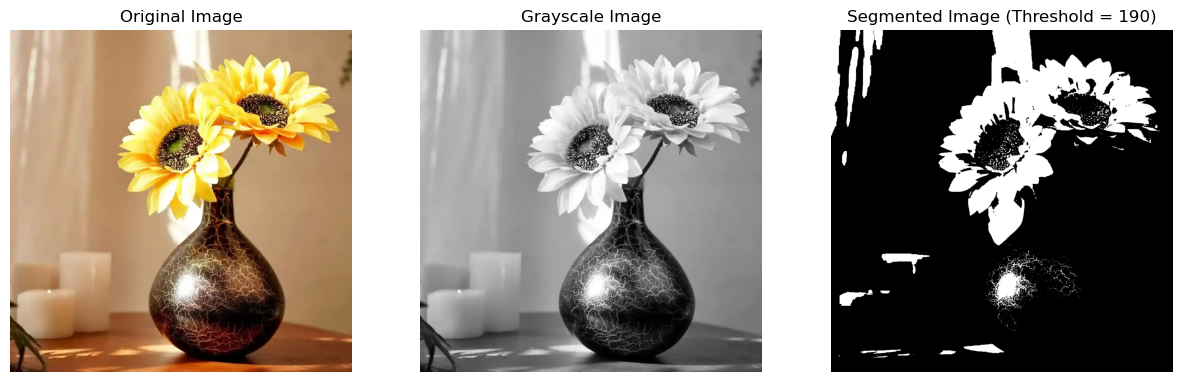

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def threshold_segmentation(image_path, threshold_value):
    
    # Step 1: Load the image
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    # Step 2: Apply the threshold
    _, segmented_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

    return gray_image, segmented_image

# Example Usage
if __name__ == "__main__":
    # Path to your image file
    image_path = 'flower.jpg'  # Replace with your actual image path

    # Set a threshold value (0-255)
    threshold_value = 190

    # Perform segmentation
    gray_image, segmented_result = threshold_segmentation(image_path, threshold_value)

    # Display original, grayscale, and segmented images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Grayscale Image")
    plt.imshow(gray_image, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title(f"Segmented Image (Threshold = {threshold_value})")
    plt.imshow(segmented_result, cmap='gray')
    plt.axis("off")

    plt.show()


In [35]:
!pip install scikit-learn


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.1/11.1 MB 4.3 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/11.1 MB 10.5 MB/s eta 0:00:01
   ------- -------------------------------- 2.0/11.1 MB 15.6 MB/s eta 0:00:01
   ------------- -------------------------- 3.8/11.1 MB 22.2 MB/s eta 0:00:01
   ---------------------- ----------------- 6.2/11.1 MB 28.1 MB/s eta 0:00:01
   ------------------------------ --------- 8.5/11.1 MB 32.0 MB/s eta 0:00:01
   -------------------------------------- - 10.8/11.1 MB 40.9 MB/s eta 0:00:01
   ---------------------------------------  11.1/11.1 MB 43.7 MB/s eta 0:00:01
   ---------------------------------------  11.1/11.1 MB 43.7 MB/s eta 0:00:01
   ---------------------------------------  11.1/11.1 MB 43.7 MB/s eta 0:00:01
   ---------------------------------------  11.1/11.1 MB 43.7 MB/s eta 0:00:01
   --

### MEAN SHIFT

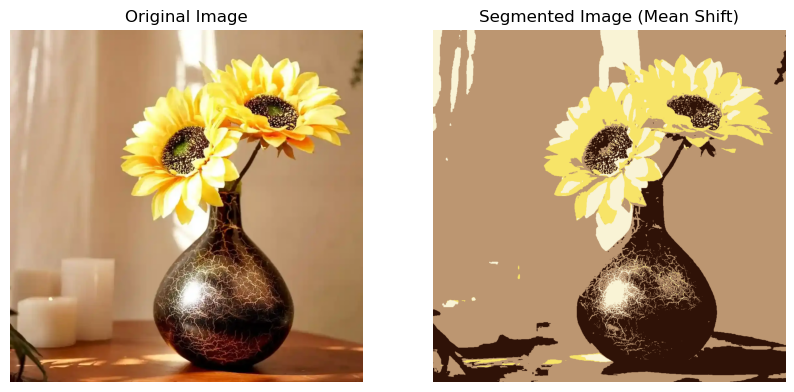

In [36]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

def mean_shift_segmentation(image_path):
    """
    Perform image segmentation using Mean Shift clustering (inbuilt function).

    Parameters:
        image_path (str): Path to the input image.

    Returns:
        segmented_image (numpy.ndarray): Segmented image.
    """
    # Step 1: Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    pixel_values = image.reshape((-1, 3))  # Reshape to a 2D array of pixels
    pixel_values = np.float32(pixel_values)  # Convert to float32 for processing

    # Step 2: Estimate bandwidth for Mean Shift
    bandwidth = estimate_bandwidth(pixel_values, quantile=0.2, n_samples=500)
    
    # Step 3: Apply Mean Shift clustering
    mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    mean_shift.fit(pixel_values)
    
    # Get cluster labels and cluster centers
    labels = mean_shift.labels_
    cluster_centers = mean_shift.cluster_centers_

    # Step 4: Map each pixel to its cluster's centroid color
    segmented_image = cluster_centers[labels].reshape(image.shape).astype(np.uint8)

    return segmented_image

if __name__ == "__main__":
    # Path to your image file
    image_path = 'flower.jpg'  # Replace with your actual image path

    # Perform segmentation
    segmented_result = mean_shift_segmentation(image_path)

    # Display original and segmented images
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image)
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.title("Segmented Image (Mean Shift)")
    plt.imshow(segmented_result)
    plt.axis("off")
    
    plt.show()


### GRAPH CUT

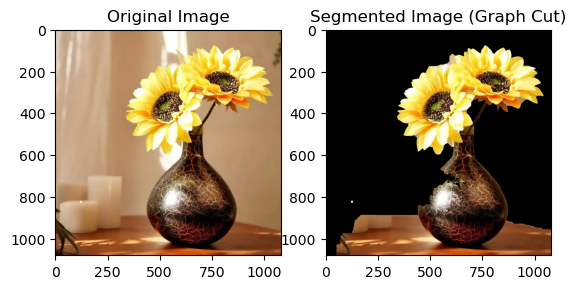

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread('flower.jpg')  # Replace with your image path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Step 2: Define a mask for GrabCut
# This is the initialization mask. We'll provide an initial rectangle around the object of interest.
mask = np.zeros(image.shape[:2], np.uint8)

# Step 3: Define the rectangle for the object of interest (x, y, width, height)
rect = (50, 50, image.shape[1]-50, image.shape[0]-50)  # Adjust the coordinates based on your image

# Step 4: Create a background and foreground model for GrabCut
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Step 5: Apply GrabCut
cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Step 6: Modify the mask to obtain the final segmentation
# Pixels labeled as 0 and 2 are background, and pixels labeled as 1 and 3 are foreground
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Step 7: Segment the image using the mask
segmented_image = image_rgb * mask2[:, :, np.newaxis]

# Step 8: Display the original and segmented images
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image (Graph Cut)')
plt.show()